In [1]:
import pandas as pd
from glob import glob
import re

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

from scipy import stats
from sklearn.cluster import HDBSCAN, DBSCAN
from sklearn.preprocessing import StandardScaler

In [3]:
# Define the function 'DB' to perform DBSCAN clustering and visualize the results for a given session, tuning, and polarization.
def DB(ses, tun, pol, band_pass=0.95, ep=0.5, ms=50):
    # Print the session, tuning, and polarization for debugging purposes.
    print(ses, tun, pol)
    
    # Read the Parquet file for the specified session, tuning, and polarization into a Pandas DataFrame.
    temp_df = pd.read_parquet(f'project_data/LH014/figs/{ses}/{ses}_{tun}_{pol}_SS.parquet')
    
    # Ensure the 'scaled_value' column is of type float.
    temp_df.scaled_value = temp_df.scaled_value.astype(float)
    
    # Get the start time in a readable format.
    t1 = pd.to_datetime(temp_df.seconds.iloc[0], unit='s').strftime("%Y-%m-%dT%H:%M:%S")
    
    # Convert the 'seconds' column to datetime format and store it in a new column 'time'.
    temp_df['time'] = pd.to_datetime(temp_df.seconds, unit='s')
    
    # Extract the time part (HH:MM:SS) from the 'time' column and store it in a new column 'time2'.
    temp_df['time2'] = temp_df.time.dt.strftime("%H:%M:%S")
    
    # Filter the DataFrame to include only rows where 'scaled_value' is between 'band_pass' and 1.
    temp_df = temp_df[temp_df.scaled_value.between(band_pass, 1)]
    
    # Get the start time and seconds for the filtered DataFrame.
    t0 = temp_df.sort_values('seconds').time.iloc[0]
    t1 = temp_df.sort_values('seconds').seconds.iloc[0]
    
    # Calculate the time difference in seconds and store it in a new column 't2'.
    temp_df['t2'] = temp_df.seconds - t1
    
    # Create a feature matrix 'X' with 't2' and 'frequency2'.
    X = temp_df[['t2', 'frequency2']].to_numpy()
    
    # Standardize the feature matrix.
    scaler = StandardScaler()
    scaler.fit(X)
    X = scaler.transform(X)
    
    # Initialize the DBSCAN clusterer with the specified parameters.
    clusterer = DBSCAN(eps=ep, min_samples=ms)
    
    # Fit the clusterer to the standardized feature matrix.
    clusterer.fit(X)
    
    # Get the cluster labels for the data points.
    labels = clusterer.labels_
    
    # Store the cluster labels in a new column 'Group' in the DataFrame.
    temp_df['Group'] = labels
    
    # Create a scatter plot of the clustered data.
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    sns.set_theme(style="whitegrid")
    g = sns.scatterplot(data=temp_df, x='time', y='frequency2', palette='muted', hue='Group', alpha=0.3, s=25)
    plt.xticks(rotation=45)
    plt.title(f'Noise Removal using DBSCAN, Session: {ses}, {tun}, {pol}, band_pass: {band_pass}, eps: {ep}, min_samples: {ms}')
    plt.ylabel('Frequency MHz')
    plt.xlabel(f'Time starting at {t0.strftime("%Y-%m-%d %H:%M")}')
    g.legend(facecolor="WHITE", framealpha=1, loc="center right", title='DBSCAN')
    
    # Set the alpha and size of the legend handles.
    for lh in g.legend_.legend_handles:
        lh.set_alpha(1)
        lh.sizes = [100]
    
    # Save the scatter plot as a PNG file.
    plt.savefig(f'project_data/LH014/figs/{ses}_{tun}_{pol}_DBSCAN.png')
    plt.close()
    
    # Create a joint plot of the clustered data excluding noise points (Group != -1).
    sns.jointplot(data=temp_df[temp_df.Group != -1], x="time", y="frequency2", hue='Group')
    plt.title('Distribution of DBSCAN Clusters', y=1.2)
    plt.ylabel('Frequency MHz')
    plt.xlabel(f'Time starting at {t0.strftime("%Y-%m-%d %H:%M")}')
    plt.xticks(rotation=45)
    
    # Save the joint plot as a PNG file.
    plt.savefig(f'project_data/LH014/figs/{ses}_{tun}_{pol}_DB_DIST.png')
    plt.close()

101 Tuning2 V
CPU times: user 1min 8s, sys: 4.81 s, total: 1min 13s
Wall time: 1min 12s


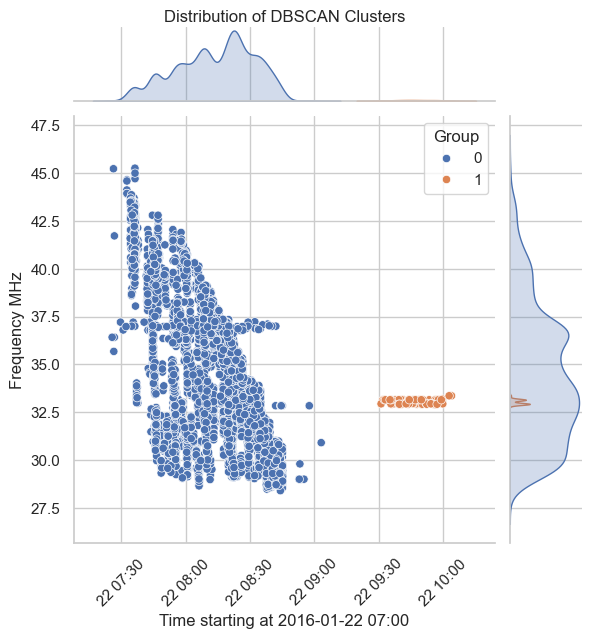

In [4]:
%%time
DB('101','Tuning2','V',ep =.5,ms=50)

In [ ]:
%%time
# DB('101','Tuning2','I',ep =.5,ms=50)
DB('111','Tuning2','V',ep =.5,ms=50)
DB('111','Tuning2','I',ep =.5,ms=50)
DB('121','Tuning2','V',ep =.5,ms=50)
DB('121','Tuning2','I',ep =.5,ms=50)
DB('131','Tuning2','V',ep =.5,ms=50)
DB('131','Tuning2','I',ep =.5,ms=50)
DB('141','Tuning2','V',ep =.5,ms=50)
DB('141','Tuning2','I',ep =.5,ms=50)
DB('261','Tuning2','V',band_pass = .5,ep =.5,ms=50)

In [ ]:
#maybe 261 261_Tuning2_I_SS_0.50
261_Tuning2_V_SS_0.50

141_Tuning2_I_SS_0.95
141_Tuning2_V_SS_0.95

131_Tuning2_V_SS_0.95
131_Tuning2_I_SS_0.95

121_Tuning2_V_SS_0.95
121_Tuning2_I_SS_0.95

111_Tuning2_I_SS_0.95
111_Tuning2_V_SS_0.95

101_Tuning2_V_SS_0.95
101_Tuning2_I_SS_0.95


In [ ]:
no signal:
251
271
241
231
221
151

